# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [134]:
#Import your libraries here

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context = "notebook", style = "darkgrid")

In [135]:
#Load the dataset and explore its variables

socials = pd.read_csv('./snsdata.csv')
socials.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [136]:
socials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [137]:
socials[socials.columns[socials.isnull().any()]].isnull().sum()

gender    2724
age       5086
dtype: int64

In [138]:
len(socials)

30000

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

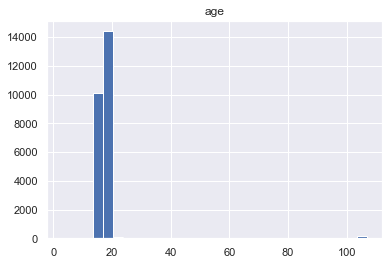

In [139]:
socials.hist('age', bins=30);

In [141]:
socials.drop('age', axis=1, inplace=True) ## Drop age since it has many missing values and all of them are floats
## Better to get rid of it instead of dropping only the missing values

In [142]:
socials['gender'].fillna('Other', inplace=True)

In [143]:
socials['gender'] = np.where(socials['gender'] == 'M', 0, 
                            np.where(socials['gender'] == 'F', 1, 2))

In [144]:
socials.head()

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [145]:
#Your code here:

# IQR
# q1 - 3 IQR < Good Data < q3 + 3 IQR

for col in socials:
    q25 = np.quantile(socials[col], 0.25)
    q75 = np.quantile(socials[col], 0.75)
    IQR = q75 - q25
    mask = (socials[col] > (q75 + 3 * IQR)) | (socials[col] < (q25 - 3 * IQR))
    out_socials = socials[mask]

In [146]:
out_socials

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,2006,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
57,2006,0,5,0,0,0,0,0,0,0,...,0,2,1,1,0,0,1,0,0,2
67,2006,1,35,0,0,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
102,2006,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
115,2006,0,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29839,2009,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
29861,2009,1,38,1,0,0,1,1,0,5,...,0,0,4,0,1,1,1,0,2,1
29922,2009,1,44,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29966,2009,1,76,1,0,0,3,2,1,0,...,0,0,0,1,0,0,0,0,0,1


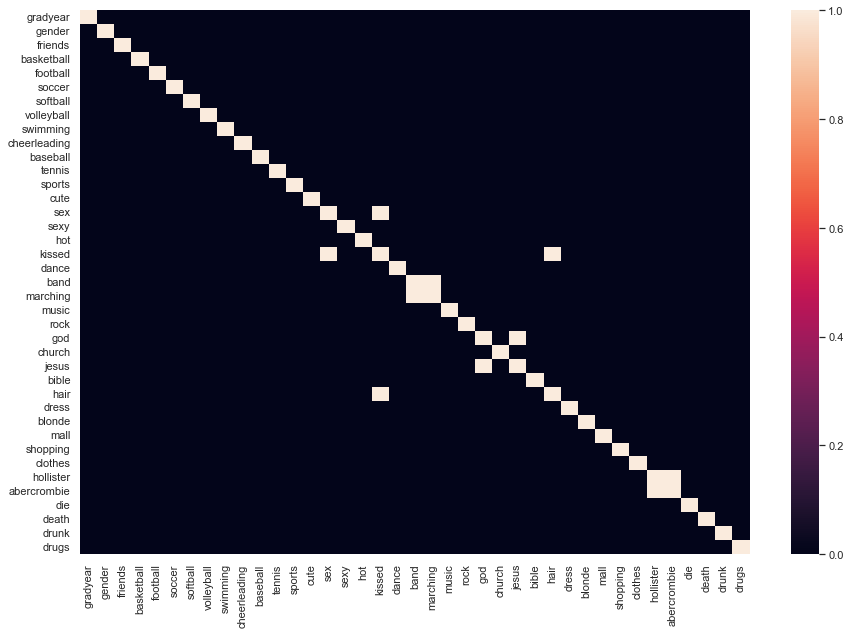

In [147]:
plt.figure(figsize=(15,10))
sns.heatmap(socials.corr()>0.3);

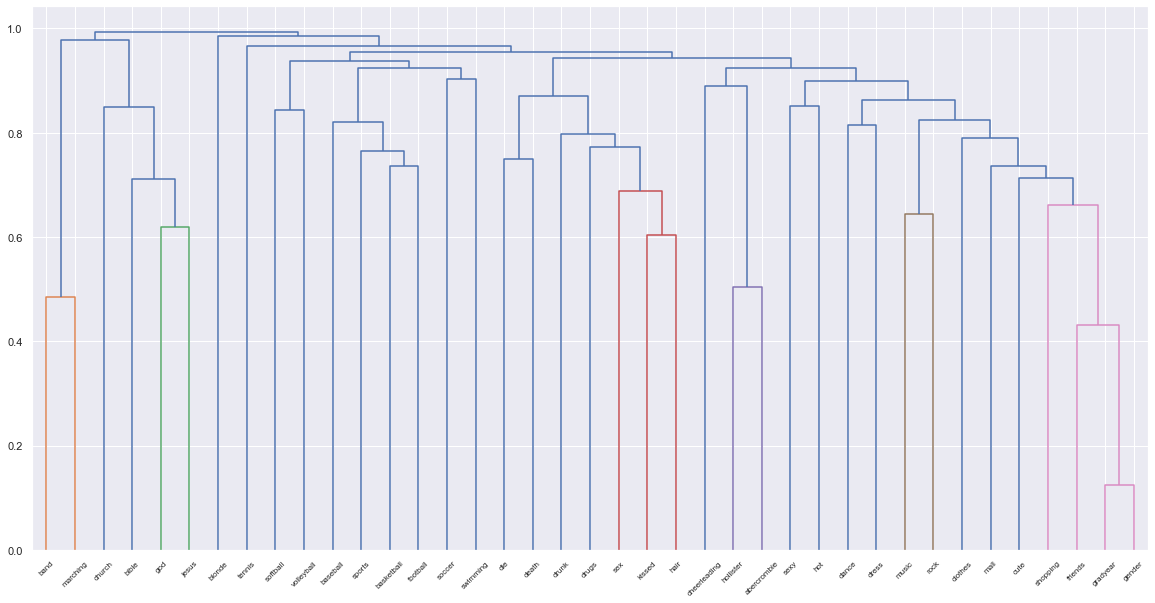

In [148]:
fig = plt.figure(figsize=(20, 10))
link = linkage(socials.T, method="complete", metric="cosine")
housing_dendogram = dendrogram(link, labels=socials.columns)

In [149]:
socials = socials[~mask]
socials.head()

,gradyear,gender,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,1,142,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [150]:
socials.shape

(28699, 39)

In [151]:
socials_sample = socials.sample(2000)

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(socials_sample) 

scaled_data = scaler.transform(socials_sample)

In [153]:
scaled_data

array([[-1.2934731 ,  0.15692283, -0.4318728 , ..., -0.22181536,
        -0.19604319,  0.        ],
       [-0.40874458,  0.15692283,  1.60455672, ..., -0.22181536,
        -0.19604319,  0.        ],
       [ 1.36071246,  0.15692283,  0.94571188, ..., -0.22181536,
        -0.19604319,  0.        ],
       ...,
       [-1.2934731 ,  0.15692283, -0.67145274, ..., -0.22181536,
        -0.19604319,  0.        ],
       [ 0.47598394, -1.78039602, -0.88108519, ..., -0.22181536,
        -0.19604319,  0.        ],
       [ 0.47598394,  0.15692283, -0.58161026, ..., -0.22181536,
        -0.19604319,  0.        ]])

In [154]:
scaled_data.shape

(2000, 39)

In [155]:
from sklearn.cluster import FeatureAgglomeration

n = 10
var_fit = FeatureAgglomeration(n_clusters=n)
var_fit.fit(scaled_data)

FeatureAgglomeration(n_clusters=10)

In [156]:
tb_var_cluster = pd.DataFrame(var_fit.transform(scaled_data), columns=["CLU_" + str(i) for i in range(n)])

In [157]:
tb_var_cluster.head()

,CLU_0,CLU_1,CLU_2,CLU_3,CLU_4,CLU_5,CLU_6,CLU_7,CLU_8,CLU_9
0,-0.313928,-0.033186,0.100354,-0.268139,-0.268699,1.270884,-0.258217,-0.218224,0.315495,-0.192796
1,0.140544,0.138529,0.465771,1.954206,-0.268699,-0.203042,-0.258217,-0.218224,0.315495,-0.192796
2,0.721406,-0.147207,-0.285161,-0.268139,0.409055,0.288267,-0.258217,-0.218224,0.315495,-0.192796
3,-0.061149,-0.373952,-0.285161,-0.268139,-0.268699,-0.203042,-0.258217,-0.218224,0.315495,-0.192796
4,0.089221,0.190185,-0.285161,-0.268139,-0.268699,-0.203042,-0.258217,-0.218224,-0.333911,-0.192796


In [158]:
tb_var_cluster.shape

(2000, 10)

In [159]:
#Your code here:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_data)

PCA(n_components=2)

In [160]:
data_pca = pca.transform(scaled_data)

In [161]:
data_pca

array([[-0.1944002 , -0.28099512],
       [ 1.28721583, -0.055941  ],
       [ 0.20686257, -0.63907049],
       ...,
       [-0.8127412 ,  0.15952661],
       [-1.06843096, -0.01726566],
       [ 5.56662434, -1.67881785]])

In [162]:
data_pca.shape

(2000, 2)

In [163]:
df_pca = pd.DataFrame(data_pca, columns=['pc1', 'pc2'])
df_pca

,pc1,pc2
0,-0.194400,-0.280995
1,1.287216,-0.055941
2,0.206863,-0.639070
3,-1.324191,-0.249039
4,-1.046809,-0.313324
...,...,...
1995,1.429891,0.172741
1996,-0.535161,-0.111344
1997,-0.812741,0.159527
1998,-1.068431,-0.017266


In [164]:
from sklearn.manifold import MDS

In [165]:
scaled_data_df = pd.DataFrame(scaled_data, columns = socials.columns)

In [166]:
hc_fit = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')

hc_fit.fit(scaled_data_df)

AgglomerativeClustering(n_clusters=5)

In [167]:
scaled_data_df['clu_ward'] = [str(x) for x in hc_fit.labels_]
socials_sample['clu_ward'] = [str(x) for x in hc_fit.labels_]

In [168]:
mds_fit = MDS(n_components=2)
mds_array = mds_fit.fit_transform(scaled_data_df.loc[:, scaled_data_df.columns != 'clu_ward'])

In [169]:
socials_mca = pd.DataFrame(mds_array, columns = ['MC_0', 'MC_1'])
socials_mca.head()

,MC_0,MC_1
0,2.457901,2.644298
1,-5.079208,-2.108894
2,-5.151025,1.558761
3,-0.153975,-0.236968
4,2.424243,-1.111786


In [170]:
socials_mca['cluster'] = [str(x) for x in hc_fit.labels_]

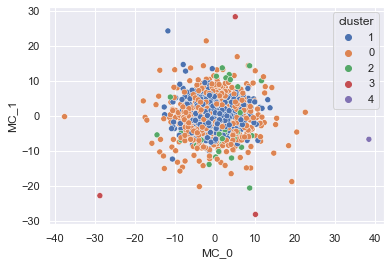

In [171]:
sns.scatterplot(data = socials_mca, x = 'MC_0', y = 'MC_1', hue = 'cluster');

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [176]:
#Your code here:

from sklearn.cluster import KMeans

In [177]:
km4_fit = KMeans(n_clusters=4)
km4_fit.fit(scaled_data)

KMeans(n_clusters=4)

In [178]:
socials_sample["km4_clu"] = km4_fit.labels_
scaled_data_df["km4_clu"] = km4_fit.labels_

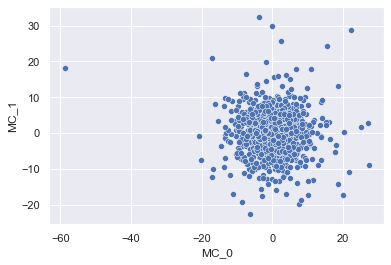

In [180]:
sns.scatterplot(data = socials_mca_fin, x = 'MC_0', y = 'MC_1');

In [179]:
scaled_data_no_cluward = scaled_data_df.drop('clu_ward', axis=1)

In [181]:
melt_sca_df = scaled_data_no_cluward.melt(id_vars=["km4_clu"])

In [182]:
melt_sca_df.head()

,km4_clu,variable,value
0,1,gradyear,-1.293473
1,1,gradyear,-0.408745
2,1,gradyear,1.360712
3,1,gradyear,0.475984
4,1,gradyear,-0.408745


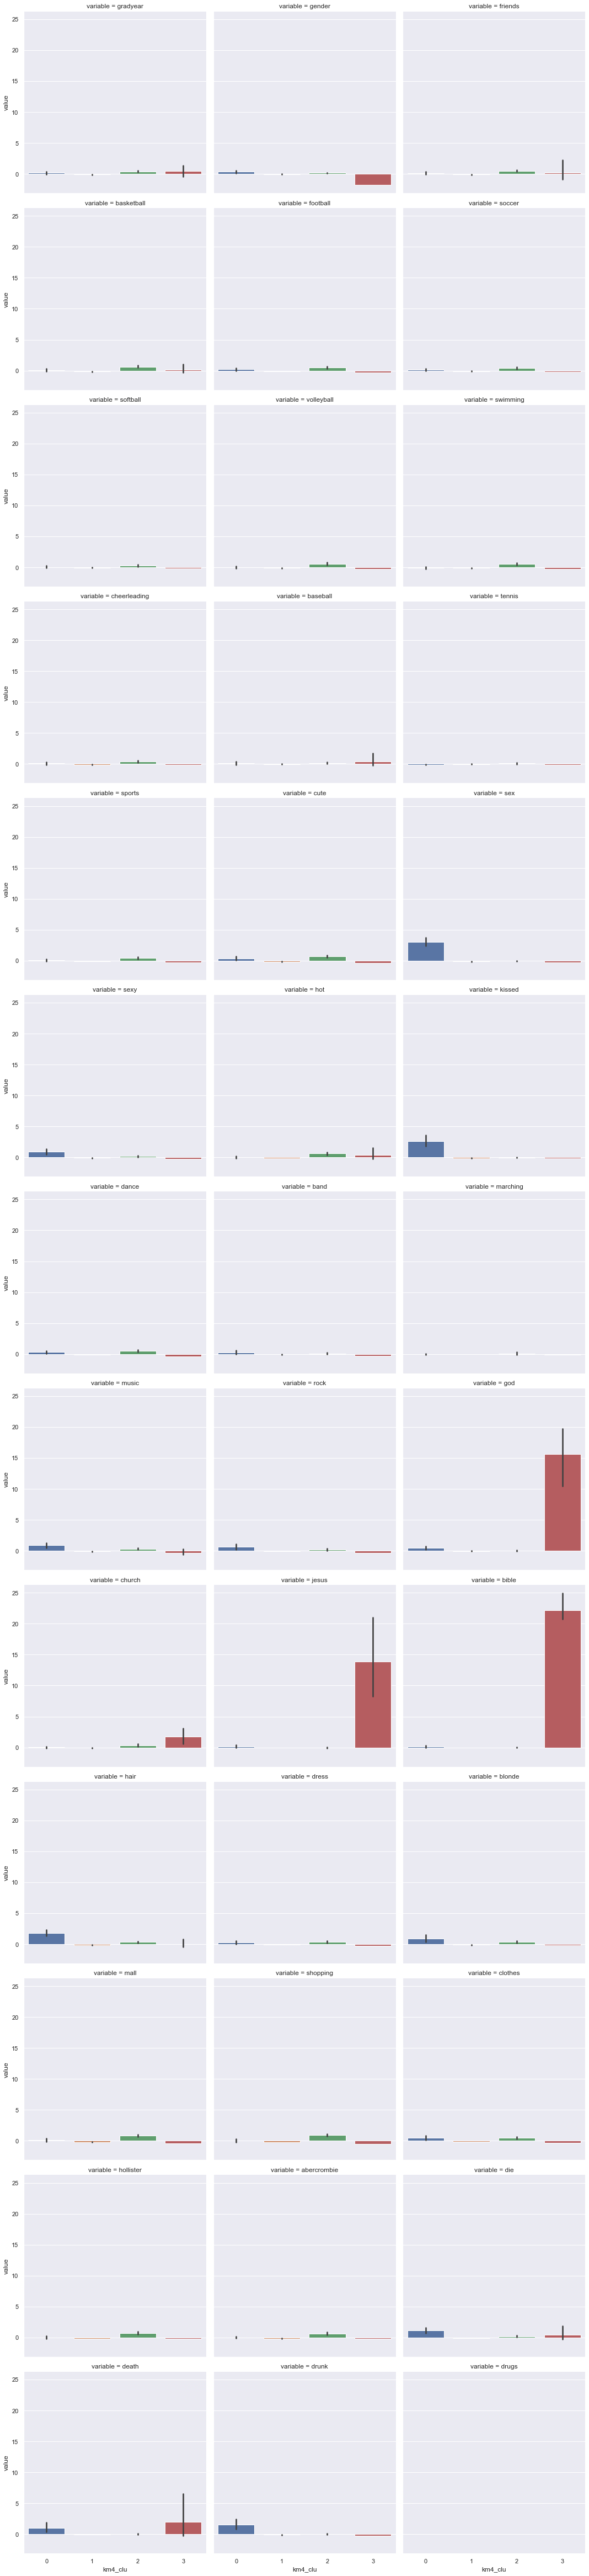

In [183]:
sns.catplot(data=melt_sca_df, x="km4_clu", y="value", col="variable", kind="bar", col_wrap=3);